In [2]:
from keras.preprocessing.image import ImageDataGenerator
import os

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(100, 100), batch_size=20, class_mode='categorical')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(100, 100), batch_size=20, class_mode='categorical')
val_gen = val_datagen.flow_from_directory(val_dir, target_size=(100, 100), batch_size=20, class_mode='categorical')

Found 1929 images belonging to 10 classes.
Found 287 images belonging to 10 classes.
Found 548 images belonging to 10 classes.


In [10]:
for data_batch, label_batch in train_gen:
    print('Data batch shape:', data_batch.shape)
    print('Label batch shape:', label_batch.shape)
    break

Data batch shape: (20, 100, 100, 3)
Label batch shape: (20, 10)


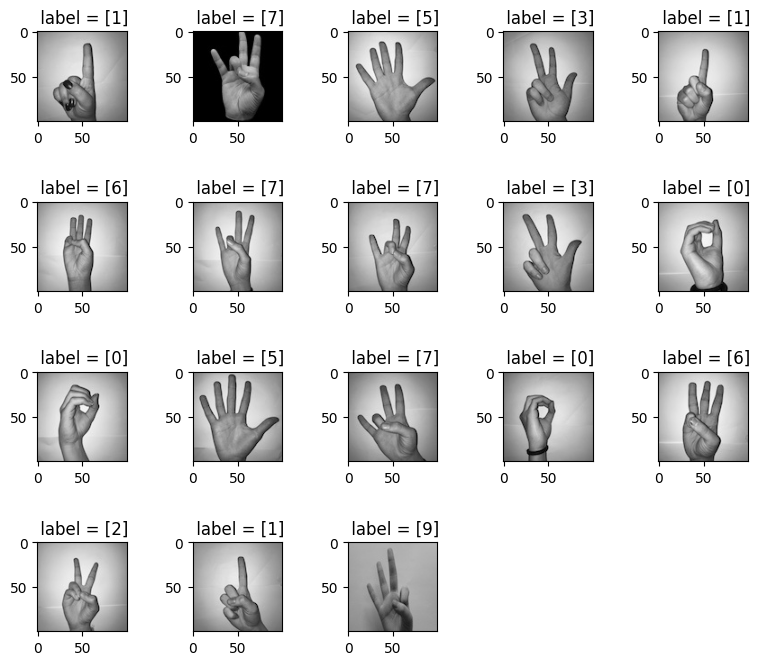

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 19):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [13]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)))
network.add(layers.MaxPool2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 76832)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                768330    
                                                                 
Total params: 769,226
Trainable params: 769,226
Non-trainable params: 0
_________________________________________________________________


In [18]:
from keras import optimizers

network.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['accuracy'])

history = network.fit_generator(train_gen, steps_per_epoch=10, epochs=20)

Epoch 1/20


C:\Users\storm\AppData\Local\Temp\ipykernel_29628\1003403055.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_gen, steps_per_epoch=10, epochs=20)


10/10 [==============================] - 1s 46ms/step - loss: 2.1883 - accuracy: 0.3200
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 1.9865 - accuracy: 0.3450
Epoch 3/20
10/10 [==============================] - 0s 42ms/step - loss: 1.9280 - accuracy: 0.4180
Epoch 4/20
10/10 [==============================] - 0s 43ms/step - loss: 1.8660 - accuracy: 0.4900
Epoch 5/20
10/10 [==============================] - 0s 46ms/step - loss: 1.8375 - accuracy: 0.4450
Epoch 6/20
10/10 [==============================] - 0s 44ms/step - loss: 1.8385 - accuracy: 0.4350
Epoch 7/20
10/10 [==============================] - 0s 45ms/step - loss: 1.8002 - accuracy: 0.4600
Epoch 8/20
10/10 [==============================] - 0s 43ms/step - loss: 1.7370 - accuracy: 0.4850
Epoch 9/20
10/10 [==============================] - 0s 43ms/step - loss: 1.7250 - accuracy: 0.5300
Epoch 10/20
10/10 [==============================] - 0s 44ms/step - loss: 1.6983 - accuracy: 0.5350
Epoch 11/20
10/10 [=

In [32]:
print('Accuracies:\n', history.history['accuracy'])

print('\nLoss:\n', history.history['loss'])

Accuracies:
 [0.3199999928474426, 0.3449999988079071, 0.41798943281173706, 0.49000000953674316, 0.4449999928474426, 0.4350000023841858, 0.46000000834465027, 0.48500001430511475, 0.5299999713897705, 0.5350000262260437, 0.5600000023841858, 0.550000011920929, 0.6190476417541504, 0.6700000166893005, 0.6000000238418579, 0.6499999761581421, 0.6600000262260437, 0.6000000238418579, 0.6349999904632568, 0.682539701461792]

Loss:
 [2.1883459091186523, 1.9864856004714966, 1.9279680252075195, 1.8660461902618408, 1.8375086784362793, 1.8385097980499268, 1.8002220392227173, 1.7369729280471802, 1.725044846534729, 1.6983237266540527, 1.6998367309570312, 1.6179195642471313, 1.5717122554779053, 1.4954652786254883, 1.500624656677246, 1.5007987022399902, 1.4311201572418213, 1.446725606918335, 1.4016990661621094, 1.3144155740737915]
